In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [194]:
df = pd.read_csv("./data/used_cars.csv", delimiter=",")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [195]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [196]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


##  Étape 2 : Feature Engineering (L'Intelligence Humaine)

In [197]:
df['Age'] = 2025 - df['Year']

In [198]:
df.drop(columns=['Car_Name'], inplace=True)
df.drop(columns=['Year'], inplace=True)

<Axes: >

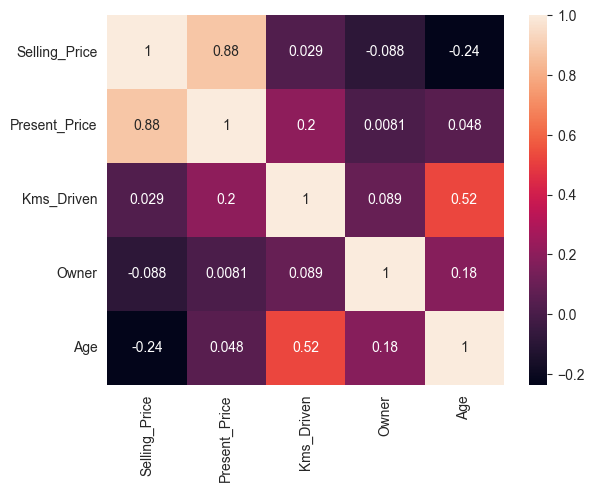

In [199]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True)

## Etape 3 : Gestion des valeurs abbérantes


In [200]:
df.isna().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [201]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

## Etape 4 : split data train and data test

In [202]:
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Etape 5: Preparation du pipeline

In [203]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [204]:
cols_nominales = ['Fuel_Type', 'Seller_Type', 'Transmission']
#cols_ordinals = []
cols_numerics = ['Present_Price', 'Kms_Driven', 'Owner', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_numerics),
        ('nom', OneHotEncoder(handle_unknown='ignore'), cols_nominales)
    ]
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

## Etape 6: entrainement des modeles

In [205]:
model_lr = make_pipeline(preprocessor, LinearRegression())
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

print("Performance of Linear Regression:")
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_score_lr = r2_score(y_test, y_pred)
print("rmse:", rmse_lr)
print("r2:", r2_score_lr)


Performance of Linear Regression:
rmse: 1.8651552135513827
r2: 0.8489813024899066


In [206]:
model_rf = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=1000, random_state=42))
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print('Performance of Random Forest:')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_pred)
print("rmse:", rmse)
print("r2:", r2_score)

Performance of Random Forest:
rmse: 0.9372053163335853
r2: 0.9618696975459745


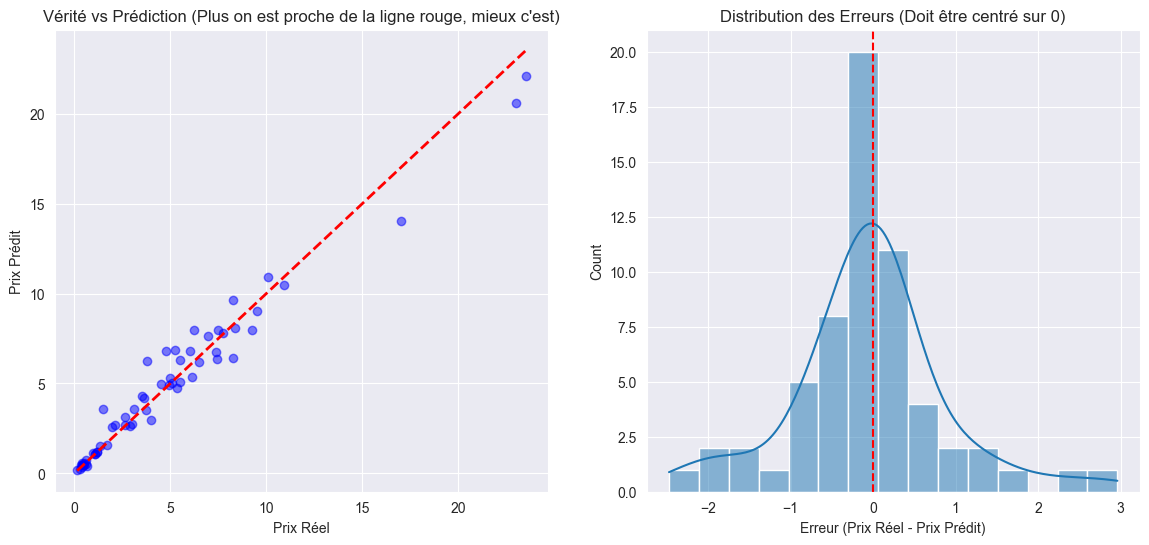

--- TOP 5 DES PIRES ERREURS ---
     Reel    Predit   Erreur  Erreur_Absolue
97  17.00  14.03865  2.96135         2.96135
90   3.80   6.27357 -2.47357         2.47357
82  23.00  20.60213  2.39787         2.39787
77   1.50   3.55886 -2.05886         2.05886
57   4.75   6.79697 -2.04697         2.04697


In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# On récupère les prédictions du meilleur modèle (Random Forest)
y_pred_rf = model_rf.predict(X_test)

plt.figure(figsize=(14, 6))

# Graphique 1 : Prédiction vs Réalité
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
# On trace la ligne rouge parfaite (x=y)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Prix Réel")
plt.ylabel("Prix Prédit")
plt.title("Vérité vs Prédiction (Plus on est proche de la ligne rouge, mieux c'est)")

# Graphique 2 : Où sont les erreurs ? (Résidus)
residus = y_test - y_pred_rf
plt.subplot(1, 2, 2)
sns.histplot(residus, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title("Distribution des Erreurs (Doit être centré sur 0)")
plt.xlabel("Erreur (Prix Réel - Prix Prédit)")

plt.show()

# Affichons les pires erreurs (les voitures où le modèle a rien compris)
import pandas as pd
df_erreurs = pd.DataFrame({'Reel': y_test, 'Predit': y_pred_rf, 'Erreur': residus})
df_erreurs['Erreur_Absolue'] = df_erreurs['Erreur'].abs()
print("--- TOP 5 DES PIRES ERREURS ---")
print(df_erreurs.sort_values(by='Erreur_Absolue', ascending=False).head(5))